Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">Elias</p>| <p style="text-align: left">Mindlberger</p> | k12043382 |
| <p style="text-align: left">Pascal</p>| <p style="text-align: left">Pilz</p> | k12111234 |


<h2 style="text-align: center">344.105/6/7 UE: Natural Language Processing (WS2022/23)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1</h1>
<h2 style="color:rgb(0,120,170)">Document Classification with Standard Machine Learning Methods</h2>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Authors:** Navid Rekab-saz, Oleg Lesota<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-preprocessing"><li style="font-size:large;font-weight:bold">Task A: Pre-processing & Feature Extraction (15 points)</li></a>
    <a href="#section-training"><li style="font-size:large;font-weight:bold">Task B: Training and Results Analysis (15 points)</li></a>
    <a href="#section-optional"><li style="font-size:large;font-weight:bold">Task C: Linear Model Interpretability (2 extra point)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective

The aim of this assignment is to implement a document (sentence) classification model using (standard) machine learning methods. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

</div>


<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points. 

Download the dataset from the Moodle page of the course.

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.labels.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.* 
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.

</div>



<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<a name="section-preprocessing"></a><h2 style="color:rgb(0,120,170)">Task A: Pre-processing & Feature Extraction (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
**Preprocessing (5 points).** Load the train, validation, and test sets. Study the text and according to your judgements, apply at least <ins>two text cleaning/preprocessing methods</ins>. Punctuations marks, numbers, dates, case-sensitivity are some examples of the elements which can be potentially considered for cleaning/preprocessing. Tokenize the result text with a tokenizer of your choice. Report your approaches to text cleaning and tokenization and the reasons of your choices. Provide some examples, showing the effects of the applied approaches on the text.

**Creating dictionary (5 points).** Create a dictionary of vocabularies following the guidelines discussed in the lecture. Next, reduce the size of dictionary using a method of your choice, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs completely from the texts, or to replace them with a special token like <OOV\>. Explain your approaches and report the statistics of the dictionary before and after the reduction.

**Creating sentence vectors (5 points).** Use the dictionary to prepare <ins>two variations of document representation vectors</ins>, separately for train, validation, and test sets. Both variations follow a Bag-of-Words approach with a different token weighting method. One applied weighting must be `tf-idf` and the other one can be any other method discussed in the lecture such as `tc`, `tf`, `BM25`. These term weighting methods should be implemented; using a library to readily calculate the term weightings is not allowed. Report the applied approaches. Calculate and report the sparsity rate of the vectors of train, validation, and test sets, namely what percentages of the vectors in each set are filled with zeros.

</div>

## Imports and globabl variables

In [1]:
import sklearn as skl
import numpy as np
import scipy as sc
import gensim
import nltk
import spacy
# import allennlp

import re
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = r"./nlp2023_24_data/"

TRAIN_PATH = DATA_PATH + "thedeep.subset.train.txt"
VAL_PATH = DATA_PATH + "thedeep.subset.validation.txt"
TEST_PATH = DATA_PATH + "thedeep.subset.test.txt"

LABEL_LEGEND_PATH = DATA_PATH + "thedeep.labels.txt"

COL_NAMES = ["_id", "data", "label"]

UNKNOWN = "<UNK>"

## Preprocessing

### Loading the data

In [3]:
RAW_TRAIN = pd.read_csv(TRAIN_PATH, header=None)
RAW_VAL = pd.read_csv(VAL_PATH, header=None)
RAW_TEST = pd.read_csv(TEST_PATH, header=None)

RAW_TRAIN.columns = RAW_VAL.columns = RAW_TEST.columns = COL_NAMES

print(f"{RAW_TRAIN.shape=}, {RAW_VAL.shape=}, {RAW_TEST.shape=}")

RAW_TRAIN.shape=(12110, 3), RAW_VAL.shape=(2596, 3), RAW_TEST.shape=(2595, 3)


In [4]:
RAW_TRAIN.head()

,_id,data,label
0,5446,In addition to the immediate life-saving inter...,9
1,8812,There are approximately 2.6 million people cla...,3
2,16709,"While aid imports have held up recently, comme...",5
3,3526,Heavy rainfalls as well as onrush of water fro...,0
4,4928,"Based on field reports 9 , the main production...",3


In [5]:
idx_to_name = {}

with open(LABEL_LEGEND_PATH, "r") as f:
    for line in f:
        num_name = line.strip().split(',')
        num, name = num_name
        idx_to_name[int(num)] = name

print(idx_to_name)

{0: 'Agriculture', 1: 'Cross', 2: 'Education', 3: 'Food', 4: 'Health', 5: 'Livelihood', 6: 'Logistic', 7: 'NFI', 8: 'Nutrition', 9: 'Protection', 10: 'Shelter', 11: 'WASH'}


### Cleaning the texts

**We choose a method only based on the training data as to keep a clean split between training and testing.**

In [6]:
print("\n\n".join([RAW_TRAIN.iloc[i]["data"] for i in range(2)]))

In addition to the immediate life-saving interventions, UNICEF is taking action to protect 200 children who have arrived at the camps in Angola without their families.

There are approximately 2.6 million people classified in this phase, of which 0.5 million are already in Emergency (IPC Phase 4) but do not meet the threshold of more than 20 percent of the population being in this Phase, for the areas to be classified in Phase 4. The counties classified in Crisis (IPC Phase 3) are Turkana, Marsabit, West Pokot, Samburu, Isiolo and Lamu, as well as parts of Mandera, Wajir, Garissa, Baringo, Laikipia, Kilifi and Kwale. Households in this category are marginally able to meet their minimum food needs but only by more rapidly depleting their assets and thus undermining their food consumption. In the absence of adequate cross-sectoral interventions, more areas and households in these counties are expected to fall into this phase by October 2017.


**Based on this it appears that most words containing uppercase letters are either the beginning of a sentence, unique names, or unique abbreviations. Therefore, turning the whole texts lowercase should not be an issue. Furthermore we also remove punctuation, special characters, and numbers, as these probably don't hold a lot of meaning in the simple methods we will use in this assignment. Numbers get replaces with \<num>.**

In [7]:
def clean_string(val):
    if isinstance(val, str):
        val = val.lower()
        val = re.sub(r"\W", " ", val)
        val = re.sub(r"\d+", "<num>", val)
        val = re.sub(r"\s{2,}", " ", val)
        return val
    else:
        return val

train = RAW_TRAIN.map(clean_string)
val = RAW_VAL.map(clean_string)
test = RAW_TEST.map(clean_string)

In [8]:
print(train.iloc[0]["data"])

in addition to the immediate life saving interventions unicef is taking action to protect <num> children who have arrived at the camps in angola without their families 


### Tokenizing

**I chose to tokenize myself, since I only want to split the words by spaces anyways and since tokenization functions from eg. gensim would not keep characters such as <>.**

In [9]:
train = train.map(lambda x: x.split() if isinstance(x, str) else x)
val = val.map(lambda x: x.split() if isinstance(x, str) else x)
test = test.map(lambda x: x.split() if isinstance(x, str) else x)

print(train.iloc[0]["data"])

['in', 'addition', 'to', 'the', 'immediate', 'life', 'saving', 'interventions', 'unicef', 'is', 'taking', 'action', 'to', 'protect', '<num>', 'children', 'who', 'have', 'arrived', 'at', 'the', 'camps', 'in', 'angola', 'without', 'their', 'families']


## Dictionary

### Creating

**We use gesnim to create a dictionary, since it has all the necessary functionality and is easy to use.**

In [10]:
dictionary = gensim.corpora.Dictionary(train["data"])

print(dictionary)
print()
sorted_words = sorted(dictionary.token2id, key=lambda k: dictionary.dfs[dictionary.token2id[k]], reverse=True)
print(", ".join([f"{word}: {dictionary.dfs[dictionary.token2id[word]]}" for word in sorted_words[:10]]))
print()
print(", ".join([f"{word}: {dictionary.dfs[dictionary.token2id[word]]}" for word in sorted_words[-10:]]))

Dictionary<26601 unique tokens: ['<num>', 'action', 'addition', 'angola', 'arrived']...>

the: 10469, of: 10124, in: 9965, and: 9482, to: 8678, <num>: 8570, a: 5856, are: 4518, for: 4256, is: 4062

ira: 1, nevadaa: 1, strand: 1, tayrona: 1, centin: 1, rsp: 1, cheruiyot: 1, cyril: 1, tasselling: 1, mirroring: 1


### Pruning

**Next we use gensim again to prune the dictionary a little bit by removing some of the most and least common words. The following removes all words that appear in less than 3 documents and all words that appear in more than 50% of documents. We replace unkown and removed words with \<UNK>.**

In [11]:
# filters all words that appear in less than 3 and more than 50% of documents
dictionary.filter_extremes(no_below=3, no_above=0.3)

print(dictionary)
print()
sorted_words = sorted(dictionary.token2id, key=lambda k: dictionary.dfs[dictionary.token2id[k]], reverse=True)
print(", ".join([f"{word}: {dictionary.dfs[dictionary.token2id[word]]}" for word in sorted_words[:10]]))
print()
print(", ".join([f"{word}: {dictionary.dfs[dictionary.token2id[word]]}" for word in sorted_words[-10:]]))

# this inserts <UNK> at the last position in the dictionary
temp = [[UNKNOWN]]
dictionary.add_documents(temp)

Dictionary<10586 unique tokens: ['action', 'addition', 'angola', 'arrived', 'at']...>

by: 3505, as: 3499, that: 3298, were: 3084, has: 2869, at: 2729, been: 2650, people: 2642, reported: 2094, an: 2061

coconut: 3, avoidable: 3, bottom: 3, dominance: 3, nalut: 3, ifelodun: 3, kiryandongo: 3, hubs: 3, andhra: 3, à: 3


### Applying

**Here we apply the dictionary to the train, val, and test data. This means we replace all tokens in the three corpora with their corresponding dictionary item. If the token was pruned it gets replaces with \<UKN>.**

In [12]:
# converting the data to ids, this way, any words that are in the data but in the dictionary will get the id for <UNK>
idx_train = train.copy()
idx_val = val.copy()
idx_test = test.copy()
idx_train["data"] = [dictionary.doc2idx(doc, len(dictionary)-1) for doc in idx_train["data"]]
idx_val["data"] = [dictionary.doc2idx(doc, len(dictionary)-1) for doc in idx_val["data"]]
idx_test["data"] = [dictionary.doc2idx(doc, len(dictionary)-1) for doc in idx_test["data"]]

# we have to create this mapping manually (for some reason 🙄)
dictionary.id2token = {v: k for k, v in dictionary.token2id.items()}

# converting the data back from id to tokens
tok_train = idx_train.copy()
tok_val = idx_val.copy()
tok_test = idx_test.copy()
tok_train["data"] = [[dictionary.id2token[id] for id in doc] for doc in idx_train["data"]]
tok_val["data"] = [[dictionary.id2token[id] for id in doc] for doc in idx_val["data"]]
tok_test["data"] = [[dictionary.id2token[id] for id in doc] for doc in idx_test["data"]]

# we rebuild the dicationary, this way we have the correct count of <UNK> and all other tokens that changed
dictionary = gensim.corpora.Dictionary(tok_train["data"])

print(idx_train.loc[0]["data"])
print()
print(" ".join(tok_train.loc[0]["data"]))
print()
sorted_words = sorted(dictionary.token2id, key=lambda k: dictionary.dfs[dictionary.token2id[k]], reverse=True)
print(", ".join([f"{word}: {dictionary.dfs[dictionary.token2id[word]]}" for word in sorted_words[:10]]))
print()
print(dictionary)

[10586, 1, 10586, 10586, 8, 10, 12, 9, 15, 10586, 13, 0, 10586, 11, 10586, 6, 16, 10586, 3, 4, 10586, 5, 10586, 2, 17, 14, 7]

<UNK> addition <UNK> <UNK> immediate life saving interventions unicef <UNK> taking action <UNK> protect <UNK> children who <UNK> arrived at <UNK> camps <UNK> angola without their families

<UNK>: 12105, by: 3505, as: 3499, that: 3298, were: 3084, has: 2869, at: 2729, been: 2650, people: 2642, reported: 2094

Dictionary<10587 unique tokens: ['<UNK>', 'action', 'addition', 'angola', 'arrived']...>


## Sentence vectors

### Unweighted document-word matrices

In [13]:
def my_bow(doc, n):
    """
    This function takes a document and the length of the dictionary n and creates a vector of length n that holds the counts of the words in the document
    """
    vec = np.zeros(n)
    doc2bow = dictionary.doc2bow(doc)
    indices = [item[0] for item in doc2bow]
    values = [item[1] for item in doc2bow]
    vec[indices] = values
    return vec

# create len(corpus)*len(dictionar) document-word matrix for each corpus. Used to calculated measures like tf-idf
doc_matr_train = np.array([my_bow(doc, len(dictionary)) for doc in tok_train["data"]])
doc_matr_val = np.array([my_bow(doc, len(dictionary)) for doc in tok_val["data"]])
doc_matr_test = np.array([my_bow(doc, len(dictionary)) for doc in tok_test["data"]])

print(f"{doc_matr_train.shape=}, {doc_matr_val.shape=}, {doc_matr_test.shape=}")

doc_matr_train.shape=(12110, 10587), doc_matr_val.shape=(2596, 10587), doc_matr_test.shape=(2595, 10587)


### tf-idf matrices

In [14]:
def tf_idf(doc_matr):
    """
    Calculates the tf-idf based on a document-word matrix
    """
    # calucate term frequency
    row_sums = np.sum(doc_matr, axis=1, keepdims=True)
    tf = np.log1p(doc_matr / row_sums)

    # calculate inverse document frequency
    idf = np.log(doc_matr.shape[0] / (1 + np.count_nonzero(doc_matr_train, axis=0))).reshape(1, -1)
    
    return tf * idf

In [15]:
tf_idf_train = tf_idf(doc_matr_train)
tf_idf_val = tf_idf(doc_matr_val)
tf_idf_test = tf_idf(doc_matr_test)

### Pivoted Length Normalization

**As a second weighting method we choose Pivoted Length Normalization, as it is a simple improvement over tf-idf that contain only one hyperparameter $b$.**

In [16]:
def piv_length_norm(doc_matr, b=1):
    """
    Calculates the pivoted length normalization based on a document-word matrix
    """
    # First we calculate tf-idf
    # calucate term frequency
    row_sums = np.sum(doc_matr, axis=1, keepdims=True)
    tf = np.log1p(doc_matr / row_sums)
    # calculate inverse document frequency
    idf = np.log(doc_matr.shape[0] / (1 + np.count_nonzero(doc_matr_train, axis=0))).reshape(1, -1)
    # mulitply
    tf_idf = tf * idf

    # then we weigh this by the length of the documents
    # average document length
    avgdl = np.mean(np.sum(doc_matr, axis=0))
    norm_val = (1 - b + b*row_sums/avgdl)
    return tf_idf / norm_val

In [17]:
pln_train = piv_length_norm(doc_matr_train)
pln_val = piv_length_norm(doc_matr_val)
pln_test = piv_length_norm(doc_matr_test)

### Sparseness

**Since all three matrices (unweigted, tf-idf, pln) have the same sparseness (percentage of 0 elements), we just give the number for the unweighted document-word matrices.**

In [18]:
print(f"Training   document-word matrix consists of {(1 - np.count_nonzero(doc_matr_train)/doc_matr_train.size)*100 :.4f}% 0s.")
print(f"Validation document-word matrix consists of {(1 - np.count_nonzero(doc_matr_val)/doc_matr_val.size)*100 :.4f}% 0s.")
print(f"Testing    document-word matrix consists of {(1 - np.count_nonzero(doc_matr_test)/doc_matr_test.size)*100 :.4f}% 0s.")

Training   document-word matrix consists of 99.6159% 0s.
Validation document-word matrix consists of 99.6234% 0s.
Testing    document-word matrix consists of 99.6239% 0s.


In [19]:
# append labels to the tf-idf and pivoted length normalized matrices
tf_idf_train = np.hstack((tf_idf_train, np.array([train["label"]]).T))
tf_idf_val = np.hstack((tf_idf_val, np.array([val["label"]]).T))
tf_idf_test = np.hstack((tf_idf_test, np.array([test["label"]]).T))

pln_train = np.hstack((pln_train, np.array([train["label"]]).T))
pln_val = np.hstack((pln_val, np.array([val["label"]]).T))
pln_test = np.hstack((pln_test, np.array([test["label"]]).T))

<a name="section-training"></a><h2 style="color:rgb(0,120,170)">Task B: Training and Results Analysis (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

To evaluate the models, use <ins>accuracy</ins> as the metric throughout the task. 

**Dummy baseline (2 points).** Create one dummy baseline classifier that predicts the validation/test labels only based on the distribution of the labels in the training set (without any use of the feature vectors). This is a weak baseline and acts as a sanity check for the actual classifiers.

**Training and tuning classifiers (5 points).** Select at least <ins>two classification algorithms</ins> from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in <ins>four experiment sets</ins> (2 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters. For each experiment, select <ins>one of the hyper-parameters and tune its value</ins>. The tuning process is done by first assigning at least <ins>three values</ins> to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter. 

**Evaluation, reporting results, and discussion (3 point).** Evaluate the selected models of the four experiments on the test set. Report the results of <ins>the four experiments on both validation and test sets (side by side) in one table as well as in one plot</ins>. Compare different experiments and models. Are the test results lower(/higher) than the validation results? If it is the case, where can it be rooted from? Among all these models and variations, what are the most important factors improving the classification results?

**Confusion matrix (2 point).** Select the best performing model among the experiments and use it to create a confusion matrix. The matrix shows the predicted versus true results per each label. Explain your observations on the matrix. Across which classes do you observe significant confusions?

**Features visualization (3 point).** Continue with the best performing model and now take its feature vectors for the *dataitems in the test set*. Project these feature vectors to a 2-dimensional space using the TSNE method.  Using these 2-dimensional vectors, create two plots where the dataitems are shown as points (small circles) on the plots. The plots look exactly the same but only differ in the coloring of the data points. The first plot colors every dataitem with its *true label*, while the second one colors each according to its *predicted label by the model*. Keep in mind to assign the same colors to the classes of the plots, so that the plots are visually comparable. Put these two plots side by side, observe the differences, and compare the results. Report your observations.


</div>

In [20]:
# predict most frequent label in set as a baseline
def most_frequent_label(data):
    return np.bincount(data[:, -1].astype(int)).argmax()

print(f"Most frequent label in training set: {most_frequent_label(tf_idf_train)}")
print(f"Most frequent label in validation set: {most_frequent_label(tf_idf_val)}")
print(f"Most frequent label in testing set: {most_frequent_label(tf_idf_test)}")

# get accuracy_score of this classifier
from sklearn.metrics import accuracy_score

print(f"Accuracy of most frequent label classifier on training set: {accuracy_score(tf_idf_train[:, -1], [most_frequent_label(tf_idf_train)]*tf_idf_train.shape[0])}")
print(f"Accuracy of most frequent label classifier on validation set: {accuracy_score(tf_idf_val[:, -1], [most_frequent_label(tf_idf_train)]*tf_idf_val.shape[0])}")
print(f"Accuracy of most frequent label classifier on testing set: {accuracy_score(tf_idf_test[:, -1], [most_frequent_label(tf_idf_train)]*tf_idf_test.shape[0])}")

Most frequent label in training set: 4
Most frequent label in validation set: 4
Most frequent label in testing set: 4
Accuracy of most frequent label classifier on training set: 0.23360858794384806
Accuracy of most frequent label classifier on validation set: 0.2561633281972265
Accuracy of most frequent label classifier on testing set: 0.24470134874759153


0it [00:00, ?it/s]

Fitting model 1/3 with max_depth=10 on tf-idf.
Fitting model 1/3 with max_depth=10 on pivoted length normalization.


1it [00:13, 13.63s/it]

Fitting model 2/3 with max_depth=15 on tf-idf.
Fitting model 2/3 with max_depth=15 on pivoted length normalization.


2it [00:32, 16.56s/it]

Fitting model 3/3 with max_depth=20 on tf-idf.
Fitting model 3/3 with max_depth=20 on pivoted length normalization.


3it [00:55, 18.64s/it]

Best model for tf-idf has max_depth=20 and an accuracy of 0.5505.
Best model for pivoted length normalization has max_depth=20 and an accuracy of 0.5177.


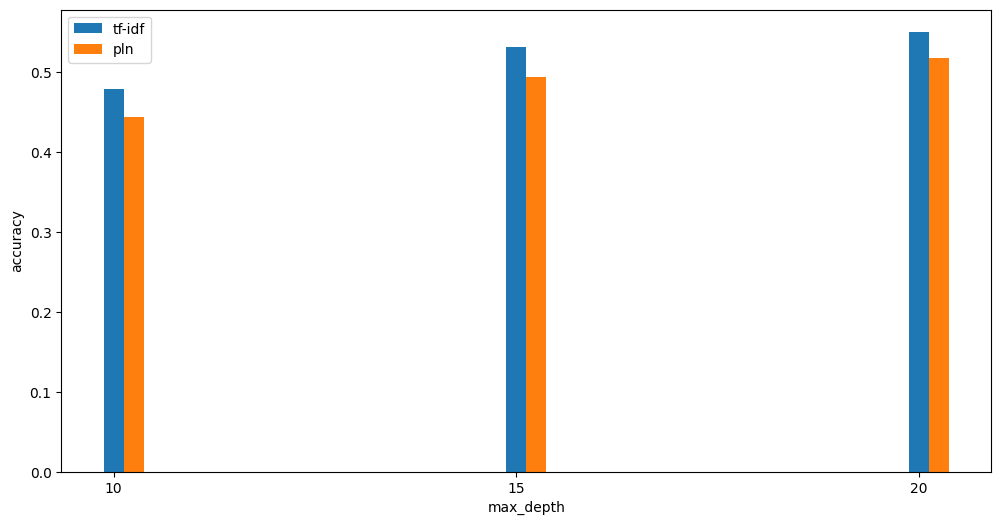

In [21]:
# Decision Tree and Hyperparameter max_depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm


param_grid = [10, 15, 20]
current_best_model_tf_idf_dt, current_best_model_pln_dt = None, None
acc_val_tf_idf_dt, acc_val_pln_dt = [], []

for i, max_depth in tqdm(enumerate(param_grid)):
    print(f"Fitting model {i+1}/{len(param_grid)} with max_depth={max_depth} on tf-idf.")
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(tf_idf_train[:, :-1], tf_idf_train[:, -1].astype(int))
    pred_val = dt.predict(tf_idf_val[:, :-1])
    acc_val_tf_idf_dt.append(accuracy_score(tf_idf_val[:, -1].astype(int), pred_val))
    if current_best_model_tf_idf_dt is None or acc_val_tf_idf_dt[i] > current_best_model_tf_idf_dt[1]:
        current_best_model_tf_idf_dt = (dt, acc_val_tf_idf_dt[i])
    
    print(f"Fitting model {i+1}/{len(param_grid)} with max_depth={max_depth} on pivoted length normalization.")
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(pln_train[:, :-1], pln_train[:, -1].astype(int))
    pred_val = dt.predict(pln_val[:, :-1])
    acc_val_pln_dt.append(accuracy_score(pln_val[:, -1].astype(int), pred_val))
    if current_best_model_pln_dt is None or acc_val_pln_dt[i] > current_best_model_pln_dt[1]:
        current_best_model_pln_dt = (dt, acc_val_pln_dt[i])

print(f"Best model for tf-idf has max_depth={current_best_model_tf_idf_dt[0].max_depth} and an accuracy of {current_best_model_tf_idf_dt[1]:.4f}.")
print(f"Best model for pivoted length normalization has max_depth={current_best_model_pln_dt[0].max_depth} and an accuracy of {current_best_model_pln_dt[1]:.4f}.")

plt.figure(figsize=(12, 6))
plt.bar(param_grid, acc_val_tf_idf_dt, width=0.25, label="tf-idf")
plt.bar(np.array(param_grid) + 0.25, acc_val_pln_dt, width=0.25, label="pln")
plt.xticks(param_grid, param_grid)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

0it [00:00, ?it/s]

Fitting model 1/3 with n_estimators=50 on tf-idf.
Fitting model 1/3 with n_estimators=50 on pivoted length normalization.


1it [00:29, 29.83s/it]

Fitting model 2/3 with n_estimators=100 on tf-idf.
Fitting model 2/3 with n_estimators=100 on pivoted length normalization.


2it [01:27, 46.24s/it]

Fitting model 3/3 with n_estimators=150 on tf-idf.
Fitting model 3/3 with n_estimators=150 on pivoted length normalization.


3it [02:51, 57.11s/it]

Best model for tf-idf has n_estimators=50 and an accuracy of 0.7388.
Best model for pivoted length normalization has n_estimators=50 and an accuracy of 0.6398.


[]

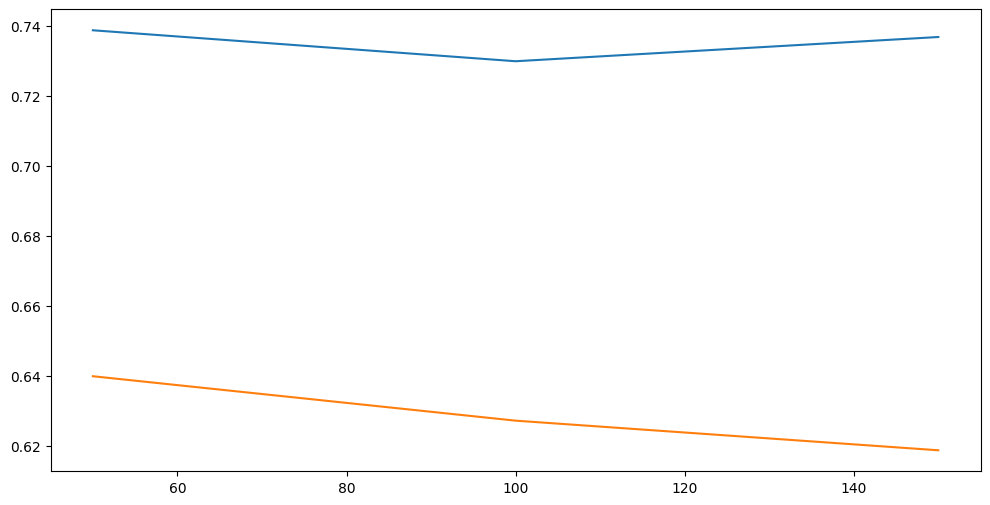

In [28]:
# Random Forest with Hyperparameter n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm


param_grid = [50, 100, 150]
current_best_model_tf_idf_rf, current_best_model_pln_rf = None, None
acc_val_tf_idf_rf, acc_val_pln_rf = [], []

for i, n_estimators in tqdm(enumerate(param_grid)):
    print(f"Fitting model {i+1}/{len(param_grid)} with n_estimators={n_estimators} on tf-idf.")
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(tf_idf_train[:, :-1], tf_idf_train[:, -1].astype(int))
    pred_val = rf.predict(tf_idf_val[:, :-1])
    acc_val_tf_idf_rf.append(accuracy_score(tf_idf_val[:, -1].astype(int), pred_val))
    if current_best_model_tf_idf_rf is None or acc_val_tf_idf_rf[i] > current_best_model_tf_idf_rf[1]:
        current_best_model_tf_idf_rf = (rf, acc_val_tf_idf_rf[i])
    
    print(f"Fitting model {i+1}/{len(param_grid)} with n_estimators={n_estimators} on pivoted length normalization.")
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(pln_train[:, :-1], pln_train[:, -1].astype(int))
    pred_val = rf.predict(pln_val[:, :-1])
    acc_val_pln_rf.append(accuracy_score(pln_val[:, -1].astype(int), pred_val))
    if current_best_model_pln_rf is None or acc_val_pln_rf[i] > current_best_model_pln_rf[1]:
        current_best_model_pln_rf = (rf, acc_val_pln_rf[i])

print(f"Best model for tf-idf has n_estimators={current_best_model_tf_idf_rf[0].n_estimators} and an accuracy of {current_best_model_tf_idf_rf[1]:.4f}.")
print(f"Best model for pivoted length normalization has n_estimators={current_best_model_pln_rf[0].n_estimators} and an accuracy of {current_best_model_pln_rf[1]:.4f}.")

plt.figure(figsize=(12, 6))
plt.plot(param_grid, acc_val_tf_idf_rf, label="tf-idf")
plt.plot(param_grid, acc_val_pln_rf, label="pln")
plt.plot()

It seems the simple Decision Tree starts to overfit somewhere between 15-20 layers of max_depth. Thus, since we only tested 15 and 20 (and 10 i.e.), we would choose 15 with a validation accuracy of around 0.55. As for Random Forests, it seems like less n_estimators generalize better, thus we would choose 50 here and get a validation accuracy of around 0.74 (on tf-idf). Interestingly, tf-idf seems to be better in all benchmarks.

<a name="section-optional"></a><h2 style="color:rgb(0,120,170)">Task C: Linear Model Interpretability (2 extra points)</h2>

<div style="background-color:rgb(224, 243, 255)">
Train a logistic regression model on one of the document representations. Take the coefficient weights, learned by the model, on each dimension (which here corresponds to each token in the dictionary). Separately for each class, study what are the tokens that have the highest contributions/importance for the predictions of the model.
</div>